In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load a seasonal dataset
df1 = pd.read_csv('tempandq.csv',index_col='date',parse_dates=True)
df1.index.freq = 'D'


In [2]:
from statsmodels.tsa.stattools import ccovf,ccf,periodogram

In [3]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [4]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

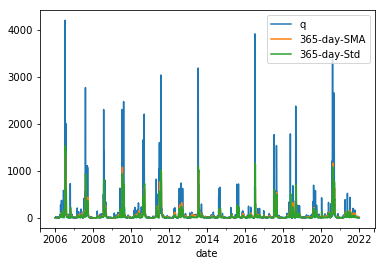

In [6]:
df1['365-day-SMA'] = df1['q'].rolling(window=12).mean()
df1['365-day-Std'] = df1['q'].rolling(window=12).std()

df1[['q','365-day-SMA','365-day-Std']].plot();

In [7]:
print('Augmented Dickey-Fuller Test on q Data')
dftest = adfuller(df1['q'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on q Data


(-9.554311169166896,
 2.522817679031429e-16,
 33,
 5810,
 {'1%': -3.4314760226350725,
  '5%': -2.8620375955128576,
  '10%': -2.5670348680682897},
 75042.18467014028)

In [8]:
print('Augmented Dickey-Fuller Test on q Data')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on q Data
ADF test statistic     -9.554311e+00
p-value                 2.522818e-16
# lags used             3.300000e+01
# observations          5.810000e+03
critical value (1%)    -3.431476e+00
critical value (5%)    -2.862038e+00
critical value (10%)   -2.567035e+00
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")